# hi

- 저번에 학습한 것에 이어 hyper parameter tuning을 해봄

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf


Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 14s (689 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to

In [2]:
%cd drive/My Drive

/content/drive/My Drive


In [3]:
%cd yolov3

/content/drive/My Drive/yolov3


# Training

- 어느 정도 학습을 진행한다.

In [ ]:
# !python3 train.py --cfg cfg/yolov3-spp.cfg --data data/custom.data --epochs 100 --weights cfg/darknet53.conv.74 --batch-size 8 --adam
!python3 train.py --cfg cfg/yolov3-spp.cfg --epochs 200 --data data/custom.data --weights weights/last.pt --batch-size 8 --adam

Apex recommended for faster mixed precision training: https://github.com/NVIDIA/apex
Your branch is behind 'origin/master' by 3 commits, and can be fast-forwarded.
  (use "git pull" to update your local branch)

Namespace(adam=True, batch_size=8, bucket='', cache_images=False, cfg='cfg/yolov3-spp.cfg', data='data/custom.data', device='', epochs=200, evolve=False, freeze_layers=False, img_size=[320, 640], multi_scale=False, name='', nosave=False, notest=False, rect=False, resume=False, single_cls=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

Start Tensorboard with "tensorboard --logdir=runs", view at http://localhost:6006/
2020-08-17 12:12:26.814083: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Model Summary: 225 layers, 6.29987e+07 parameters, 6.29987e+07 gradients
Optimizer groups: 76 .bias, 76 Conv2d.weight, 73 other
Caching labels data/custom/

## Hyper parameter tuning

In [6]:
!python3 train.py --cfg cfg/yolov3-spp3.cfg --data data/custom.data --epochs 2 --weights weights/best.pt --batch-size 8 --evolve

Apex recommended for faster mixed precision training: https://github.com/NVIDIA/apex
Your branch is behind 'origin/master' by 3 commits, and can be fast-forwarded.
  (use "git pull" to update your local branch)

Namespace(adam=False, batch_size=8, bucket='', cache_images=False, cfg='cfg/yolov3-spp3.cfg', data='data/custom.data', device='', epochs=2, evolve=True, freeze_layers=False, img_size=[320, 640], multi_scale=False, name='', nosave=False, notest=False, rect=False, resume=False, single_cls=False, weights='weights/best.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

Model Summary: 225 layers, 6.39267e+07 parameters, 6.39267e+07 gradients
Optimizer groups: 76 .bias, 76 Conv2d.weight, 73 other
weights/best.pt has been trained for 55 epochs. Fine-tuning for 2 additional epochs.
Caching labels data/custom/labels.npy (1193 found, 0 missing, 80 empty, 0 duplicate, for 1273 images): 100% 1273/1273 [00:00<00:00, 22274.95it/s]
Caching labels data/custom

# result

- 최적의 parameter와 성능 결과를 그래프로 보여줌 (fitness 척도 기준 )
  - fitness : mAP와 F1에 가중치를 두고 계산한 성능 평가 척도

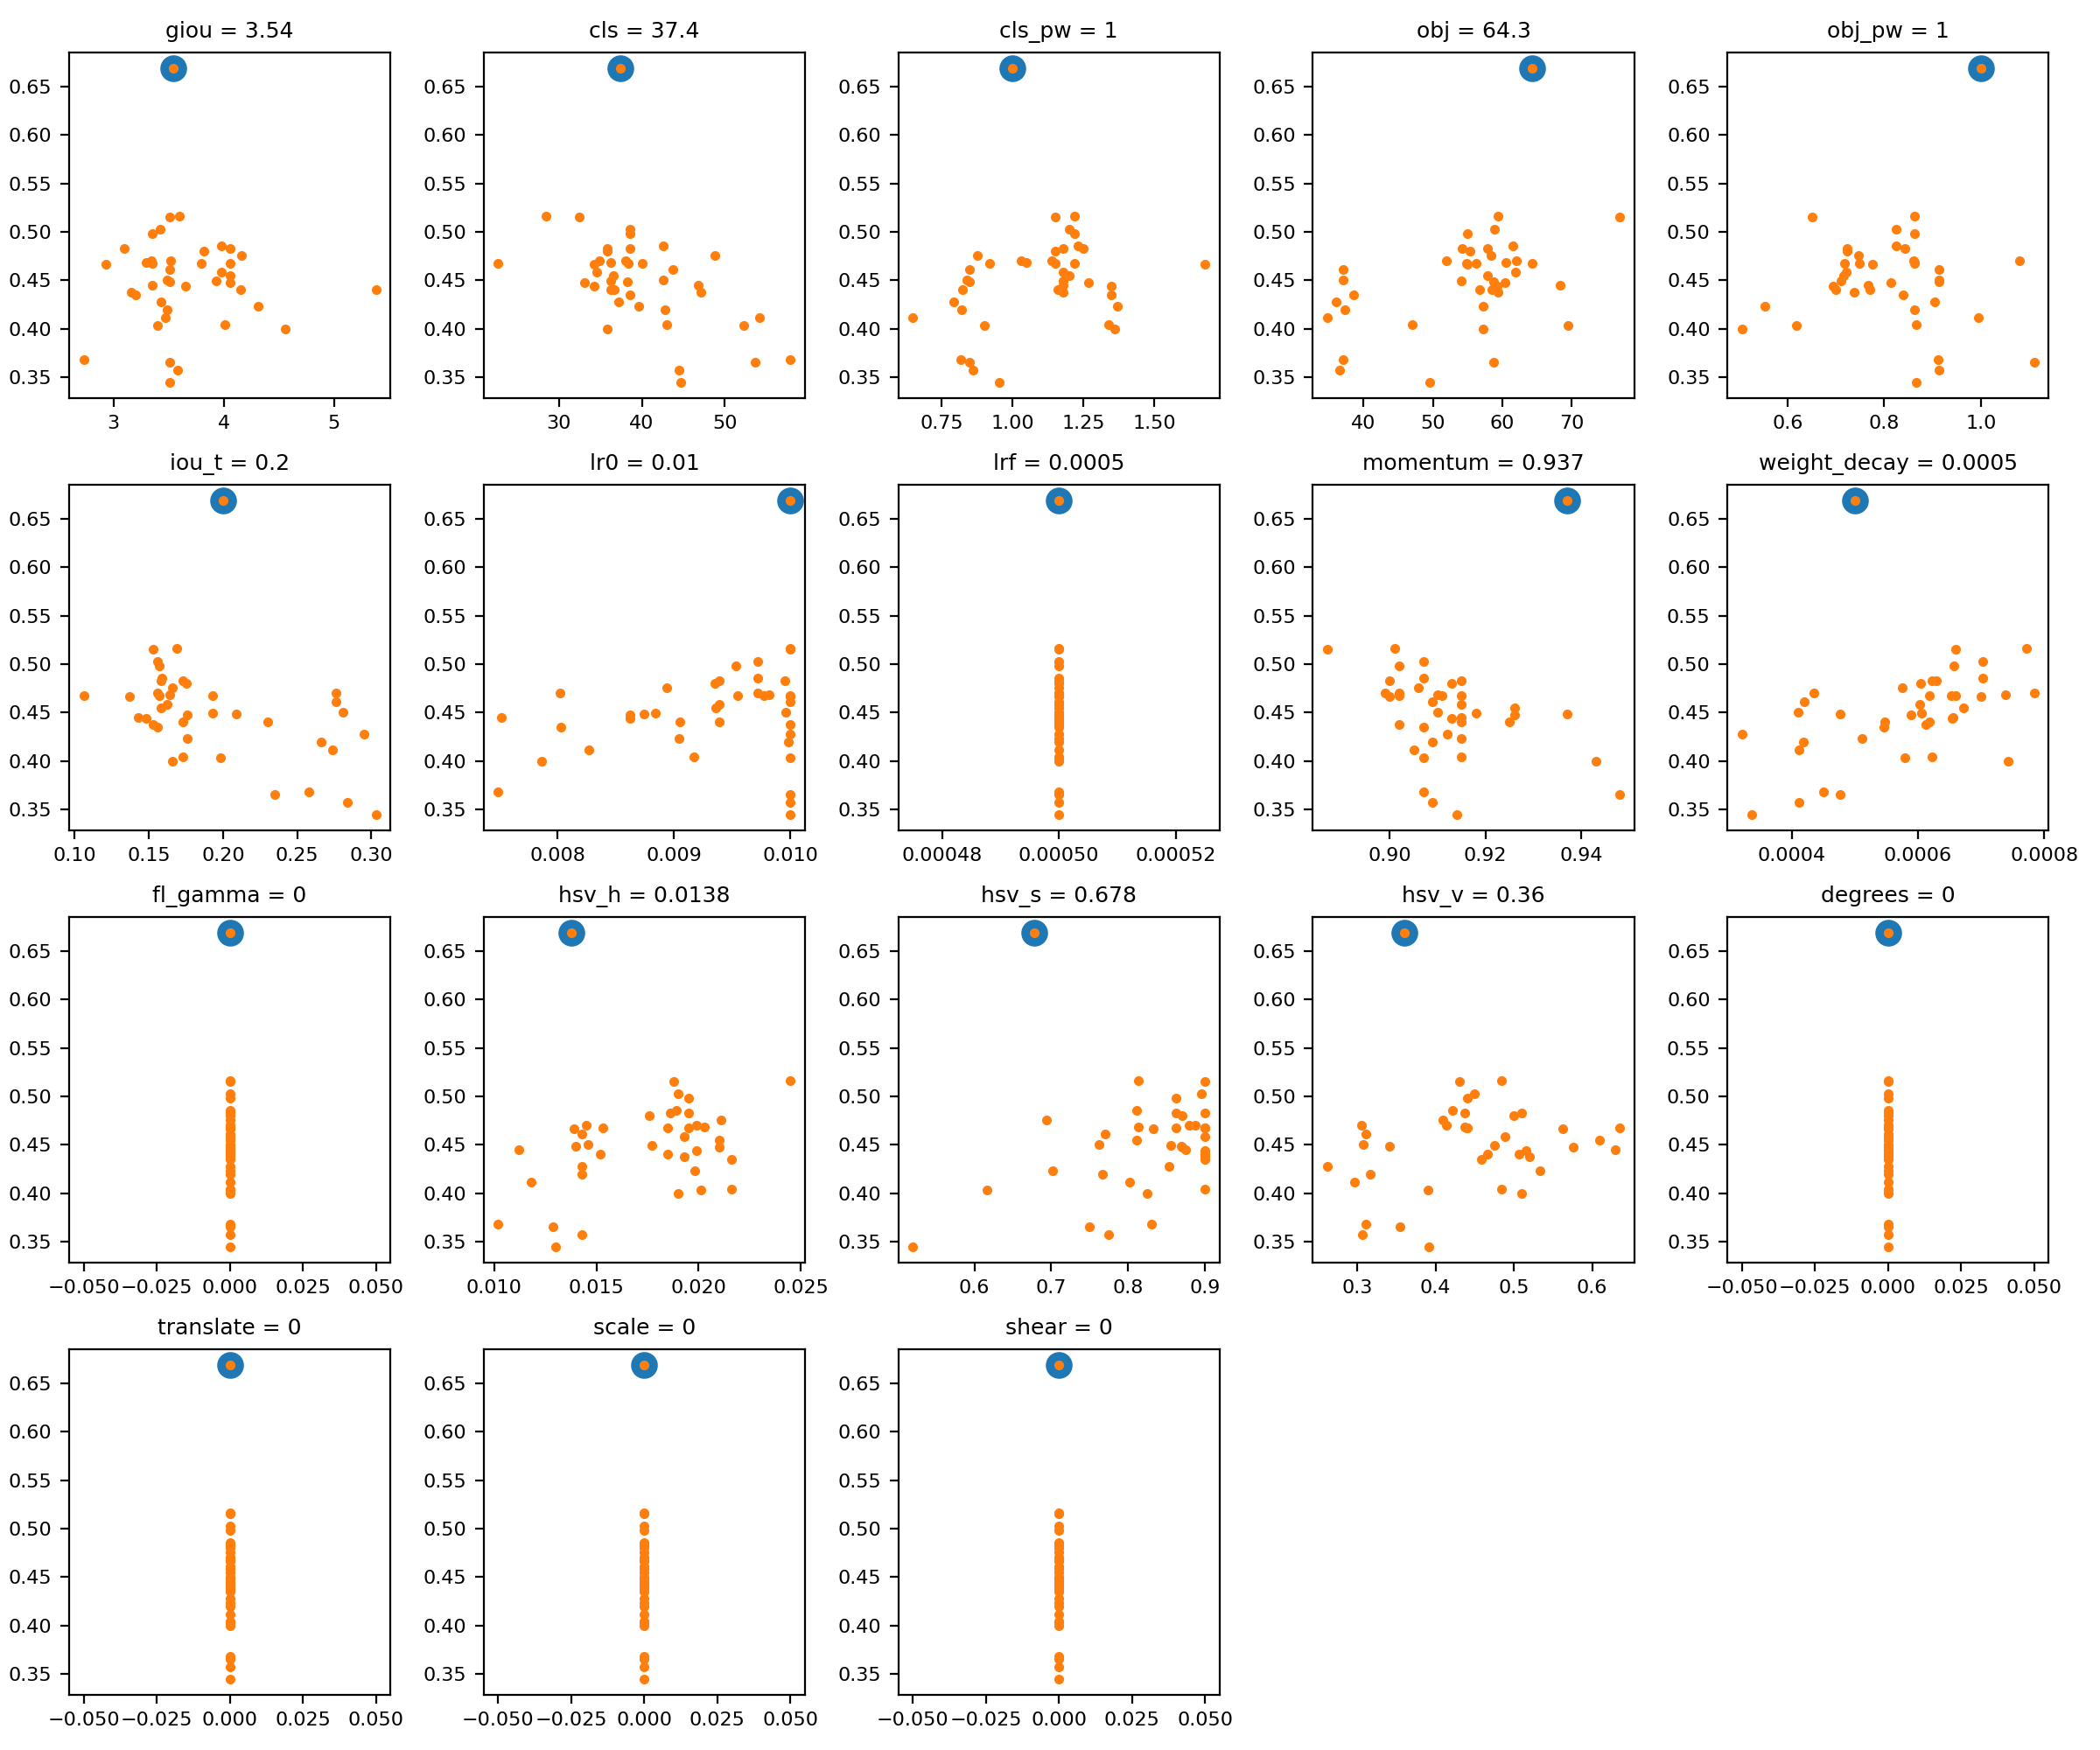

In [7]:
from PIL import Image
Image.open('evolve.png')

## 조정 후 학습하기

In [4]:
!python3 train.py --cfg cfg/yolov3-spp3.cfg --data data/custom.data --epochs 50 --weights weights/last.pt --batch-size 8

Apex recommended for faster mixed precision training: https://github.com/NVIDIA/apex
Your branch is behind 'origin/master' by 3 commits, and can be fast-forwarded.
  (use "git pull" to update your local branch)

Namespace(adam=False, batch_size=8, bucket='', cache_images=False, cfg='cfg/yolov3-spp3.cfg', data='data/custom.data', device='', epochs=50, evolve=False, freeze_layers=False, img_size=[320, 640], multi_scale=False, name='', nosave=False, notest=False, rect=False, resume=False, single_cls=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

Start Tensorboard with "tensorboard --logdir=runs", view at http://localhost:6006/
2020-08-18 14:35:02.445384: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Model Summary: 225 layers, 6.39267e+07 parameters, 6.39267e+07 gradients
Optimizer groups: 76 .bias, 76 Conv2d.weight, 73 other
weights/last.pt has been t

# Metric

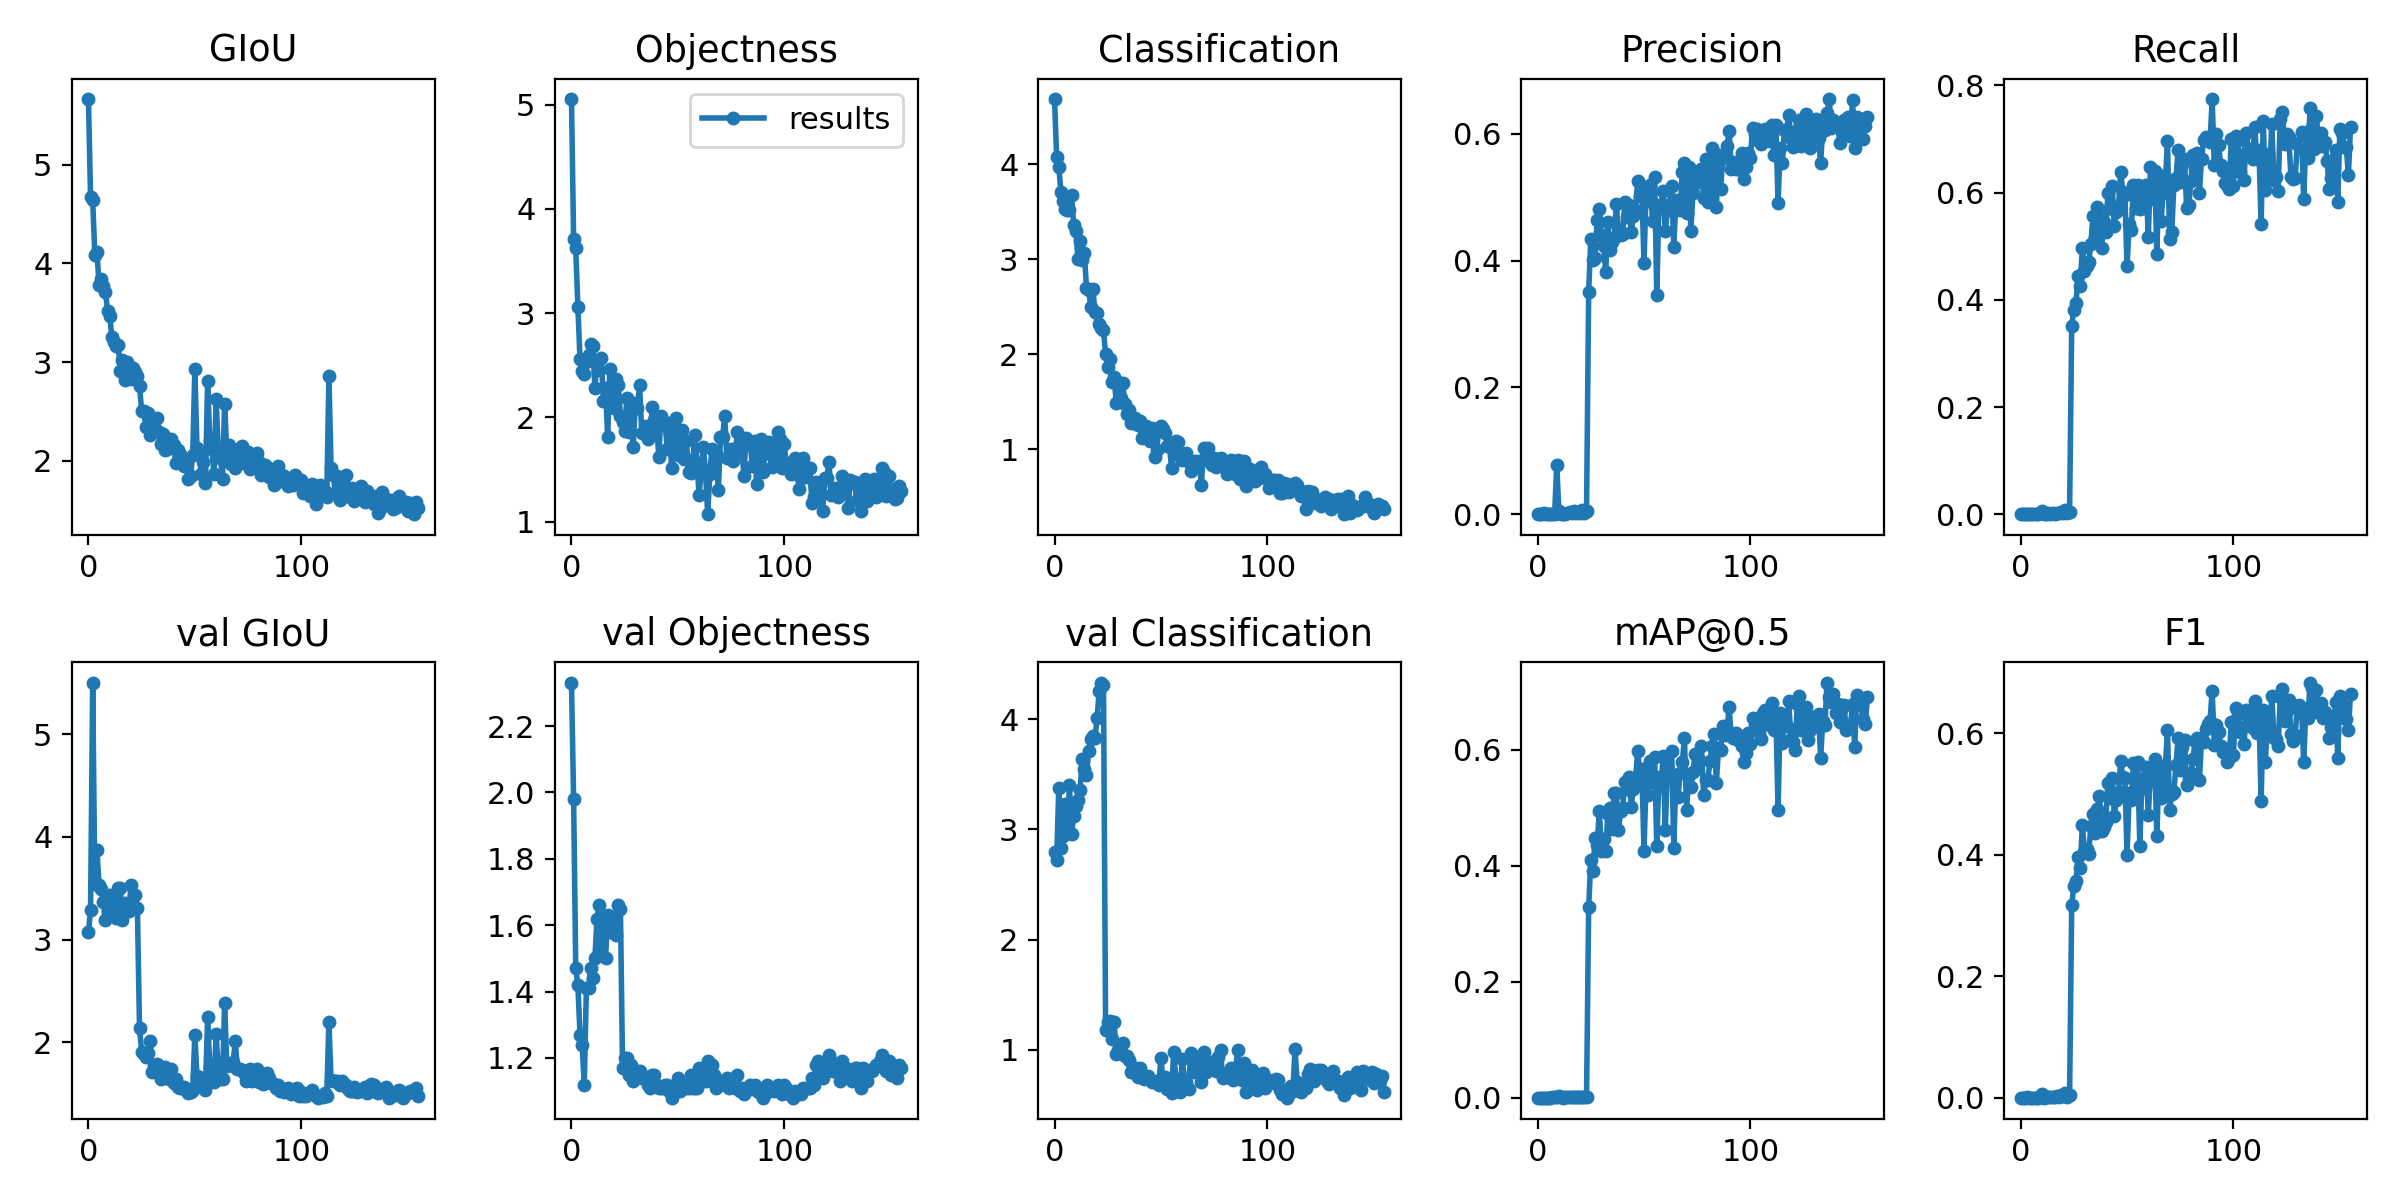

In [5]:
from PIL import Image
!python3 -c "from utils import utils; utils.plot_results()"  # plot training results
Image.open('results.png')

# 앞으로 생각해야 할 것

- model selection 과정(둘 중에 하나 정하기)
  1. train과 tuning을 번갈아 가면 하는 구조(train 여러 번 한 뒤 tuning)
    - 데이터를 다 넣고 시작할 예정
  2. 초반에 tuning을 해놓고 learning rate 정도만 바꿔가며 학습하는 구조
    - 데이터 일부를 sampling 후 tuning하기

- 위의 것을 하나의 과정으로 (pipeline) 구성

- 목적에 맞는 성능 평가 척도(fitness) 재정의 
